In [252]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


In [253]:
# Define the path to your train data file
data_path = "./Datasets/train.csv"

# Load the data into a Pandas DataFrame
df = pd.read_csv(data_path)


In [254]:
# Display the first few rows of the DataFrame
df.head()

,rent_approval_date,town,block,street_name,flat_type,flat_model,floor_area_sqm,furnished,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,monthly_rent
0,2021-09,jurong east,257,Jurong East Street 24,3 room,new generation,67.0,yes,1983,1.344518,103.738630,0.0,yuhua east,jurong east,west region,1600
1,2022-05,bedok,119,bedok north road,4-room,new generation,92.0,yes,1978,1.330186,103.938717,0.0,bedok north,bedok,east region,2250
2,2022-10,toa payoh,157,lorong 1 toa payoh,3-room,improved,67.0,yes,1971,1.332242,103.845643,0.0,toa payoh central,toa payoh,central region,1900
3,2021-08,pasir ris,250,Pasir Ris Street 21,executive,apartment,149.0,yes,1993,1.370239,103.962894,0.0,pasir ris drive,pasir ris,east region,2850
4,2022-11,kallang/whampoa,34,Whampoa West,3-room,improved,68.0,yes,1972,1.320502,103.863341,0.0,bendemeer,kallang,central region,2100


In [255]:
# Get basic summary statistics for numerical columns
df.describe()

,floor_area_sqm,lease_commence_date,latitude,longitude,elevation,monthly_rent
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.0,60000.000000
mean,94.480458,1990.876367,1.359443,103.840110,0.0,2590.328333
std,24.082642,12.141435,0.042505,0.071627,0.0,714.910468
min,34.000000,1966.000000,1.270380,103.685228,0.0,300.000000
25%,73.000000,1981.000000,1.330939,103.778803,0.0,2100.000000
50%,93.000000,1988.000000,1.354024,103.845301,0.0,2400.000000
75%,110.000000,2000.000000,1.386968,103.897418,0.0,3000.000000
max,215.000000,2019.000000,1.457071,103.964915,0.0,6950.000000


In [256]:
# Get information about the data types and missing values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   rent_approval_date   60000 non-null  object 
 1   town                 60000 non-null  object 
 2   block                60000 non-null  object 
 3   street_name          60000 non-null  object 
 4   flat_type            60000 non-null  object 
 5   flat_model           60000 non-null  object 
 6   floor_area_sqm       60000 non-null  float64
 7   furnished            60000 non-null  object 
 8   lease_commence_date  60000 non-null  int64  
 9   latitude             60000 non-null  float64
 10  longitude            60000 non-null  float64
 11  elevation            60000 non-null  float64
 12  subzone              60000 non-null  object 
 13  planning_area        60000 non-null  object 
 14  region               60000 non-null  object 
 15  monthly_rent         60000 non-null 

In [257]:
# Check unique values in categorical columns
print(f' Unique value in rent_approval_date: {df["rent_approval_date"].unique()}')
print(f' Unique value in town: {df["town"].unique()}')
print(f' Unique value in block: {df["block"].unique()}')
print(f' Unique value in street_name: {df["street_name"].unique()}')
print(f' Unique value in flat_type: {df["flat_type"].unique()}')
print(f' Unique value in flat_model: {df["flat_model"].unique()}')

 Unique value in rent_approval_date: ['2021-09' '2022-05' '2022-10' '2021-08' '2022-11' '2023-04' '2021-01'
 '2022-06' '2021-10' '2021-04' '2021-03' '2022-02' '2021-07' '2022-12'
 '2023-01' '2022-01' '2023-07' '2021-06' '2023-05' '2023-03' '2021-05'
 '2021-02' '2022-07' '2023-06' '2022-03' '2023-02' '2021-12' '2022-04'
 '2021-11' '2022-08' '2022-09']
 Unique value in town: ['jurong east' 'bedok' 'toa payoh' 'pasir ris' 'kallang/whampoa'
 'bukit panjang' 'sengkang' 'ang mo kio' 'bishan' 'punggol'
 'choa chu kang' 'clementi' 'bukit batok' 'sembawang' 'jurong west'
 'woodlands' 'queenstown' 'yishun' 'bukit timah' 'marine parade'
 'bukit merah' 'geylang' 'hougang' 'tampines' 'serangoon' 'central']
 Unique value in block: ['257' '119' '157' ... '509c' '218a' '880a']
 Unique value in street_name: ['Jurong East Street 24' 'bedok north road' 'lorong 1 toa payoh' ...
 'seng poh road' 'Jurong West Street 51' 'Zion Road']
 Unique value in flat_type: ['3 room' '4-room' '3-room' 'executive' '5 room

# Process the first column(rent_approval_date)


In [258]:
# Check the data type of the 'rent_approval_date' column
df['rent_approval_date'].dtype

dtype('O')

In [259]:
# Convert 'rent_approval_date' to a datetime data type
df['rent_approval_date'] = pd.to_datetime(df['rent_approval_date'])
df['rent_approval_date'].dtype

dtype('<M8[ns]')

In [260]:
# Extract year, month, and day
df['approval_year'] = df['rent_approval_date'].dt.year
df['approval_month'] = df['rent_approval_date'].dt.month
df['approval_day'] = df['rent_approval_date'].dt.day

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option i

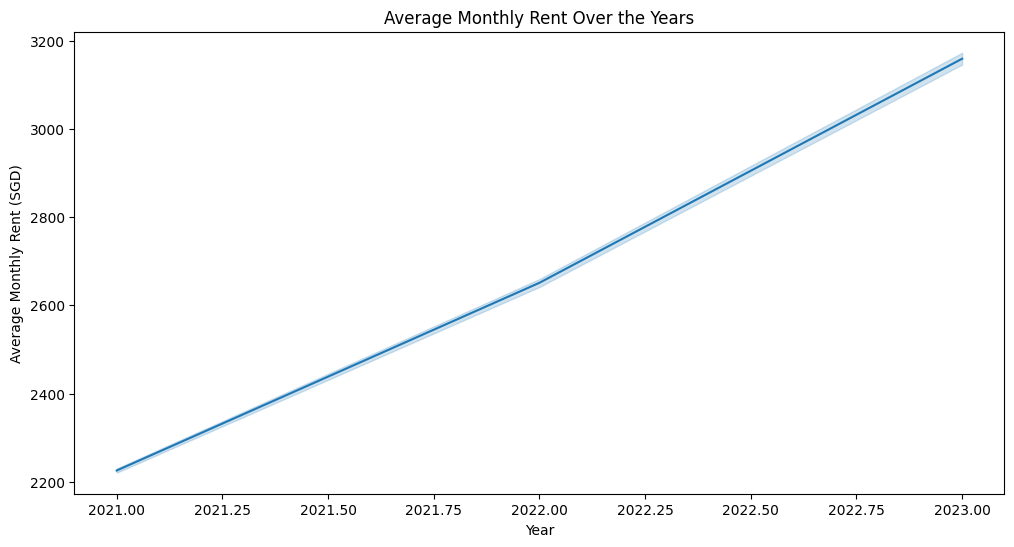

In [261]:
# Example: Line plot of average monthly rent over years
plt.figure(figsize=(12, 6))
sns.lineplot(x='approval_year', y='monthly_rent', data=df)
plt.title("Average Monthly Rent Over the Years")
plt.xlabel("Year")
plt.ylabel("Average Monthly Rent (SGD)")
plt.show()

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


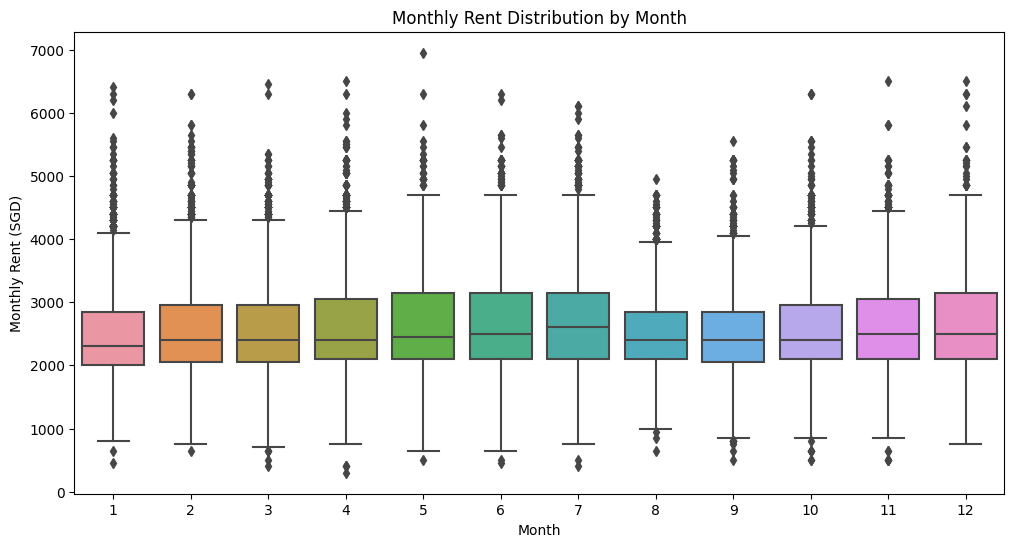

In [262]:
# Example: Box plot of monthly rent by month
plt.figure(figsize=(12, 6))
sns.boxplot(x='approval_month', y='monthly_rent', data=df)
plt.title("Monthly Rent Distribution by Month")
plt.xlabel("Month")
plt.ylabel("Monthly Rent (SGD)")
plt.show()

# Process the second column(town)


In [263]:
# Display the frequency distribution of towns
town_counts = df['town'].value_counts()
print(town_counts)

town
jurong west        4413
tampines           4183
sengkang           4003
bedok              3644
ang mo kio         3494
yishun             3378
bukit merah        3160
woodlands          3031
hougang            2859
punggol            2700
toa payoh          2407
clementi           2272
bukit batok        2236
choa chu kang      2117
queenstown         2033
kallang/whampoa    1860
geylang            1716
pasir ris          1712
jurong east        1710
bukit panjang      1607
sembawang          1446
bishan             1437
serangoon          1299
central             615
marine parade       612
bukit timah          56
Name: count, dtype: int64


C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


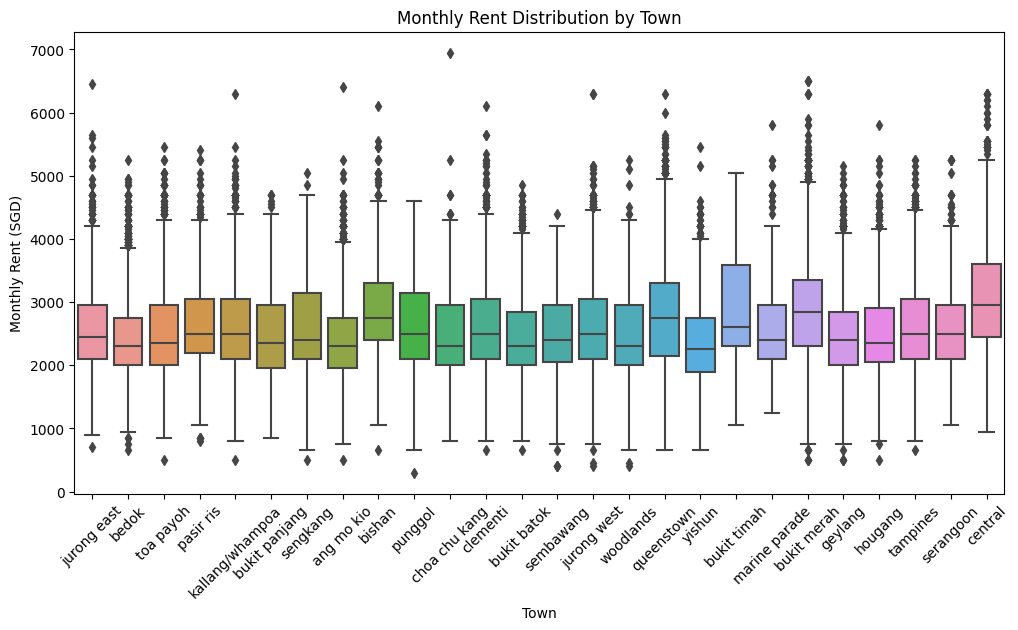

In [264]:
# Create a box plot of monthly rent by town
plt.figure(figsize=(12, 6))
sns.boxplot(x='town', y='monthly_rent', data=df)
plt.title("Monthly Rent Distribution by Town")
plt.xlabel("Town")
plt.ylabel("Monthly Rent (SGD)")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [265]:
# Target Encoding
# Calculate the mean monthly rent for each town
town_mean_rent = df.groupby('town')['monthly_rent'].mean().reset_index()

# Merge the mean rent values back into the original DataFrame
df = df.merge(town_mean_rent, on='town', how='left')

# Drop the original 'town' column
df.drop(columns=['town'], inplace=True)

# Rename the new column to indicate it contains encoded values
df.rename(columns={'monthly_rent_y': 'town'}, inplace=True)
df.rename(columns={'monthly_rent_x': 'monthly_rent'}, inplace=True)


In [266]:
df.head()

,rent_approval_date,block,street_name,flat_type,flat_model,floor_area_sqm,furnished,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,monthly_rent,approval_year,approval_month,approval_day,town
0,2021-09-01,257,Jurong East Street 24,3 room,new generation,67.0,yes,1983,1.344518,103.738630,0.0,yuhua east,jurong east,west region,1600,2021,9,1,2595.146199
1,2022-05-01,119,bedok north road,4-room,new generation,92.0,yes,1978,1.330186,103.938717,0.0,bedok north,bedok,east region,2250,2022,5,1,2438.227223
2,2022-10-01,157,lorong 1 toa payoh,3-room,improved,67.0,yes,1971,1.332242,103.845643,0.0,toa payoh central,toa payoh,central region,1900,2022,10,1,2516.680515
3,2021-08-01,250,Pasir Ris Street 21,executive,apartment,149.0,yes,1993,1.370239,103.962894,0.0,pasir ris drive,pasir ris,east region,2850,2021,8,1,2686.857477
4,2022-11-01,34,Whampoa West,3-room,improved,68.0,yes,1972,1.320502,103.863341,0.0,bendemeer,kallang,central region,2100,2022,11,1,2665.537634


# Process the third column(blk)

In [267]:
# Remove non-numeric characters from the 'block' column and convert to numeric
df['block'] = df['block'].str.replace(r'\D+', '', regex=True).astype(int)


In [268]:
df['block']

0        257
1        119
2        157
3        250
4         34
        ... 
59995    441
59996     95
59997    862
59998     67
59999    445
Name: block, Length: 60000, dtype: int32

# Process the fifth column(blk)

In [269]:
# Remove non-numeric characters and handle 'executive' values
df['flat_type'] = df['flat_type'].str.extract('(\d+|\bexecutive\b)', expand=False)

# Map 'executive' to '5' and fill missing values with a default value, e.g., -1
df['flat_type'] = df['flat_type'].replace('executive', '5').fillna('-1')

# Convert 'flat_type' to integers
df['flat_type'] = df['flat_type'].astype(int)

df['flat_type']

0        3
1        4
2        3
3       -1
4        3
        ..
59995    3
59996    4
59997    5
59998    5
59999    3
Name: flat_type, Length: 60000, dtype: int32

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


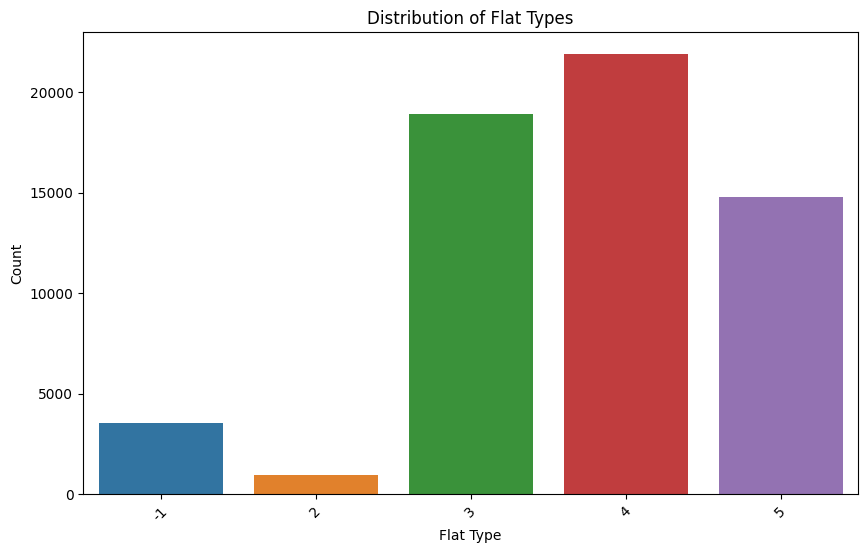

In [270]:
# Create a bar plot of flat types
plt.figure(figsize=(10, 6))
sns.countplot(x='flat_type', data=df)
plt.title("Distribution of Flat Types")
plt.xlabel("Flat Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [250]:
df.head()

,rent_approval_date,block,street_name,flat_type,flat_model,floor_area_sqm,furnished,lease_commence_date,latitude,longitude,elevation,subzone,planning_area,region,monthly_rent,approval_year,approval_month,approval_day,town
0,2021-09-01,257,Jurong East Street 24,3,new generation,67.0,yes,1983,1.344518,103.738630,0.0,yuhua east,jurong east,west region,1600,2021,9,1,2595.146199
1,2022-05-01,119,bedok north road,4,new generation,92.0,yes,1978,1.330186,103.938717,0.0,bedok north,bedok,east region,2250,2022,5,1,2438.227223
2,2022-10-01,157,lorong 1 toa payoh,3,improved,67.0,yes,1971,1.332242,103.845643,0.0,toa payoh central,toa payoh,central region,1900,2022,10,1,2516.680515
3,2021-08-01,250,Pasir Ris Street 21,NaN,apartment,149.0,yes,1993,1.370239,103.962894,0.0,pasir ris drive,pasir ris,east region,2850,2021,8,1,2686.857477
4,2022-11-01,34,Whampoa West,3,improved,68.0,yes,1972,1.320502,103.863341,0.0,bendemeer,kallang,central region,2100,2022,11,1,2665.537634


C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


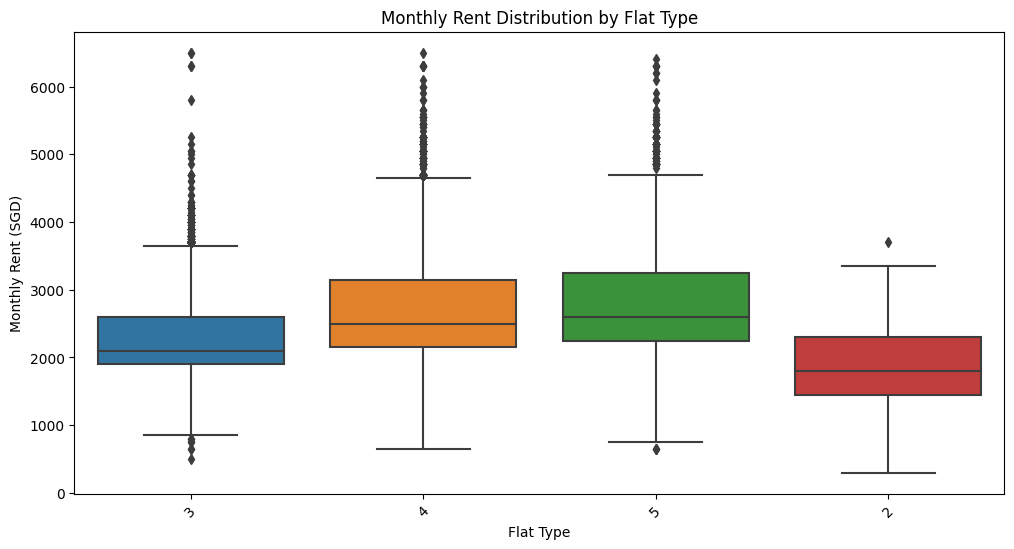

In [251]:
# Create a box plot of monthly rent by flat type
plt.figure(figsize=(12, 6))
sns.boxplot(x='flat_type', y='monthly_rent', data=df)
plt.title("Monthly Rent Distribution by Flat Type")
plt.xlabel("Flat Type")
plt.ylabel("Monthly Rent (SGD)")
plt.xticks(rotation=45)
plt.show()